<a href="https://colab.research.google.com/github/winston-dsouza/Sign-Language-Detection-using-flask/blob/master/SignLanguage_static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0-rc4'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [ ]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolutio Layer 
classifier.add(Conv2D(filters=32,  kernel_size=(3,3), input_shape = (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPool2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Conv2D(filters=32,  kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size =(2,2)))

#Adding 3rd Concolution Layer
classifier.add(Conv2D(filters=64,  kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/DatasetBG/mydata.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/tmp/mydata/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        '/tmp/mydata/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 6500 images belonging to 26 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=25,
        validation_data = test_set,
        validation_steps = 6500
      )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
800/800 [==============================] - 94s 118ms/step - loss: 2.1366 - accuracy: 0.3544 - val_loss: 0.6916 - val_accuracy: 0.7983
Epoch 2/25
800/800 [==============================] - 92s 115ms/step - loss: 0.7340 - accuracy: 0.7524 - val_loss: 0.2898 - val_accuracy: 0.9154
Epoch 3/25
800/800 [==============================] - 92s 115ms/step - loss: 0.4477 - accuracy: 0.8450 - val_loss: 0.2129 - val_accuracy: 0.9349
Epoch 4/25
800/800 [==============================] - 92s 115ms/step - loss: 0.3298 - accuracy: 0.8859 - val_loss: 0.2125 - val_accuracy: 0.9461
Epoch 5/25
800/800 [==============================] - 92s 115ms/step - loss: 0.2691 - accuracy: 0.9030 - val_loss: 0.1968 - val_accuracy: 0.9472
Epoch 6/25
800/800 [==============================] - 92s 115ms/step - loss: 0.2358 - accuracy: 0.9180 - val_loss: 0.1434 - val_accuracy: 0.9752
Epoch 7/25
800/800 [==============================] - 

In [ ]:
import h5py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
classifier.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'}) 
model_file.SetContentFile('model.h5')
model_file.Upload()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


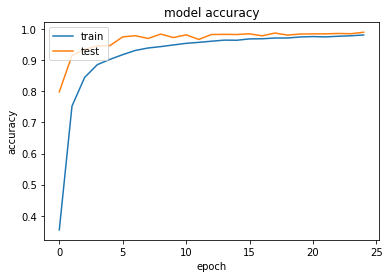

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

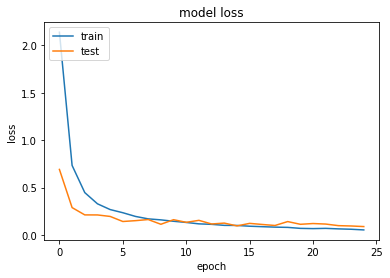

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
single= '/tmp/mydata/test_set/A/1.png'

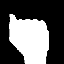

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img(single,target_size=(64, 64))
test_image

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [ ]:
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0